### Business Analytics Group Assignment - Predicting Airbnb Listing Prices in Melbourne__ {-}

--- 

**Kaggle Competition Ends:** Friday, 2 June 2023 @ 3:00pm (Week 13)  
**Assignment Due Date on iLearn:** Friday, 2 June 2023 @ 11.59pm (Week 13)   

**Overview:**   

- In the group assignment you will form a team of 3 students and participate in a forecasting competition on Kaggle
- The goal is to predict listed prices of Airbnb properties in Melbourne based on various Airbnb characteristics and regression models
- Assessment Summary:  
    - Write a problem statement and perform Exploratory Data Analysis  
    - Clean up data, deal with categorical features and missing observations, and create new explanatory variables (feature engineering)  
    - Construct and tune forecasting models, produce forecasts and submit your predictions to Kaggle  
    - Each member of the team will record a video presentation of their work  
    - Marks will be awarded producing a prediction in the top 5 positions of their unit as well as for reaching the highest ranking on Kaggle amongst all teams.

**Instructions:** 

- Form a team of 3 students (minimum 2 students)  
- Each team member needs to join [https://www.kaggle.com](https://www.kaggle.com/)  
- Choose a team leader and form a team in the competition [https://www.kaggle.com/t/a154f28787174b628a2b7eaa238a5c12](https://www.kaggle.com/t/a154f28787174b628a2b7eaa238a5c12)
    - Team leader to click on `team` and join and invite other team members to join
    - Your **team's name must start** with your unit code, for instance you could have a team called BUSA8001_masterful_geniuses or BUSA3020_l33t 
- All team members should work on all the tasks listed below however   
    - Choose a team member who will be responsible for one of each of the 3 tasks listed below    
- Your predictions must be generated by a model you develop here 
    - You will receive a mark of zero if your code provided here does not produce the forecasts you submit to Kaggle

**Marks**: 

- Total Marks: 40
- Your individual mark will consist of:  
    - 50% x overall assignment mark + 45% x mark for the task that you are responsible for + 5% x mark received from your teammates for your effort in group work 

**Competition Marks:**  

- 1 mark: Ranking in the top 5 places of your unit on Kaggle (make sure you name your team as instructed above)   
- 2 marks: Reaching the first place in your unit (make sure you name your team as instructed above)   


**Submissions:**  

1. On Kaggle: submit your team's forecast in order to be ranked by Kaggle
    - Can do this as many times as necessary while building their model  
2. On iLearn **only team leader to submit** this Jupyter notebook re-named `Group_Assignment_Team_Name.ipynb` where Team_Name is your team's name on Kaggle   
    - The Jupyter notebook must contain team members names/ID numbers, and team name in the competition
    - Provide answers to the 3 Tasks below in the allocated cells including all codes/outputs/writeups 
    - One 15 minute video recording of your work 
        - Each team member to provide a 5 minute presentation of the Task that they led (it is best to jointly record your video using Zoom)
        - When recording your video make sure your face is visible, that you share your Jupyter Notebook and explain everything you've done in the submitted Jupyter notebook on screen
        - 5 marks will be deducted from each Task for which there is no video presentation or if you don't follow the above instructions
        
3. On iLearn each student needs to submit a file with their teammates' names, ID number and a mark for their group effort (out of 100%)



---

**Fill out the following information**

For each team member provide name, Student ID number and which task is performed below

- Team Name on Kaggle: `BUSA8001_superhosts`
- Team Leader and Team Member 1: `Felix Rosenberger`
- Team Member 2: `John Rizk`

---

## Task 1: Problem Description and Initial Data Analysis {-}

1. Read the Competition Overview on Kaggle [https://www.kaggle.com/t/a154f28787174b628a2b7eaa238a5c12](https://www.kaggle.com/t/a154f28787174b628a2b7eaa238a5c12)
2. Referring to Competition Overview and the data provided on Kaggle write about a 500 words **Problem Description** focusing on key points that will need to be addressed as first steps in Tasks 2 and 3 below, using the following headings:
    - Forecasting Problem - explain what you are trying to do and how it could be used in the real world (i.e. why it may be important)
    - Evaluation Criteria - explain the criteria is used to assess forecast performance 
    - Types of Variables/Features
    - Data summary and main data characteristics
    - Missing Values (only explain what you found at this stage)
    - Hint: you should **not** discuss any specific predictive algorithms at this stage
    - Note: This task should be completed in a single Markdown cell (text box)
    
Total Marks: 12


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from xgboost import cv
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from pprint import pprint

In [125]:
# Task 1 code here
# setting display options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# read in data
trainpath = "train.csv"
train = pd.read_csv(trainpath)
testpath = "test.csv"
test = pd.read_csv(testpath)

# concatenate dataframes to reduce redundancies in operations
df = pd.concat([train, test])

In [126]:
df = df.reset_index(drop=True)

#### Check variable characteristics

##### Property Type

In [127]:
df.property_type.value_counts(dropna=False)

Entire rental unit                    4145
Entire home                           1484
Private room in home                  1007
Entire condo                           431
Private room in rental unit            371
Entire serviced apartment              325
Entire townhouse                       302
Entire guesthouse                      282
Entire guest suite                     218
Private room in townhouse              190
Entire cottage                         138
NaN                                    123
Entire loft                             79
Private room in condo                   68
Private room in villa                   62
Farm stay                               61
Entire villa                            58
Private room in bed and breakfast       54
Room in hotel                           49
Room in boutique hotel                  40
Private room in guest suite             36
Entire vacation home                    36
Entire bungalow                         36
Room in ser

##### Room Type

In [128]:
df.room_type.value_counts(dropna=False)

Entire home/apt    7685
Private room       2019
NaN                 175
Shared room          71
Hotel room           50
Name: room_type, dtype: int64

##### Neighbourhood

In [129]:
df.neighbourhood_cleansed.value_counts(dropna=False)

Melbourne            3007
Port Phillip         1163
Yarra Ranges          755
Yarra                 668
Stonnington           647
Moreland              359
Monash                266
Wyndham               254
Whitehorse            232
Darebin               217
Boroondara            209
Maribyrnong           204
Glen Eira             195
Bayside               179
NaN                   150
Frankston             143
Kingston              137
Hobsons Bay           133
Moonee Valley         130
Manningham            118
Banyule               107
Casey                 102
Cardinia              101
Hume                   96
Brimbank               85
Knox                   74
Whittlesea             61
Nillumbik              59
Melton                 54
Greater Dandenong      48
Maroondah              47
Name: neighbourhood_cleansed, dtype: int64

In [130]:
# Data Cleaning

#Functions
def replace_string(df, c, s, r='', f='strip'):
    if f == 'find_replace':
        mask = (df[c].notnull()) & (df[c].astype(str).str.contains(s))
        df.loc[mask, c] = df.loc[mask, c].astype(str).str.replace(s, r)
    if f == 'replace':
        df[c] = df[c].replace(s, r)
    elif f == 'strip':
        df[c] = df[c].dropna().astype(str).str.replace(s, r, regex=True)
    return df

def replace_numeric(df, c, n, r=0, f='match'):
    if f == 'isgreater':
        df.loc[df[c] > n, c] = r
    elif f == 'isless':
        df.loc[df[c] < n, c] = r
    elif f == 'match':
        df.loc[df[c] == n, c] = r
    return df

def convert_numeric(df, c, t, d=1):
    df[c] = pd.to_numeric(df[c], errors='coerce')
    df[c] = df[c].astype(t)
    df[c] = df[c] / d
    return df

In [131]:
df = replace_string(df, 'price', '$','', 'strip')
df = replace_string(df, 'price', ',','', 'strip')
df = convert_numeric(df, 'price', 'float', 1)

In [132]:
train = replace_string(train, 'price', '$','', 'strip')
train = replace_string(train, 'price', ',','', 'strip')
train = convert_numeric(train, 'price', 'float', 1)

In [133]:
df.groupby('neighbourhood_cleansed').price.mean().sort_values(ascending=False)

neighbourhood_cleansed
Boroondara           894.947712
Yarra                353.306695
Yarra Ranges         349.385484
Knox                 336.793651
Melbourne            335.346266
Bayside              325.077519
Kingston             265.690722
Port Phillip         263.867609
Cardinia             244.456790
Nillumbik            241.120000
Manningham           224.040000
Stonnington          214.961187
Moonee Valley        208.488636
Hobsons Bay          200.314286
Glen Eira            199.652778
Melton               198.325581
Frankston            198.207921
Hume                 194.348485
Wyndham              194.119760
Whitehorse           191.851852
Maroondah            183.270270
Whittlesea           179.805556
Brimbank             165.966667
Banyule              165.911392
Maribyrnong          163.893617
Monash               160.780347
Darebin              158.417219
Casey                150.600000
Moreland             144.171053
Greater Dandenong    115.406250
Name: price, dtyp

In [134]:
train.groupby('neighbourhood_cleansed').price.mean().sort_values(ascending=False)

neighbourhood_cleansed
Boroondara           894.947712
Yarra                353.306695
Yarra Ranges         349.385484
Knox                 336.793651
Melbourne            335.346266
Bayside              325.077519
Kingston             265.690722
Port Phillip         263.867609
Cardinia             244.456790
Nillumbik            241.120000
Manningham           224.040000
Stonnington          214.961187
Moonee Valley        208.488636
Hobsons Bay          200.314286
Glen Eira            199.652778
Melton               198.325581
Frankston            198.207921
Hume                 194.348485
Wyndham              194.119760
Whitehorse           191.851852
Maroondah            183.270270
Whittlesea           179.805556
Brimbank             165.966667
Banyule              165.911392
Maribyrnong          163.893617
Monash               160.780347
Darebin              158.417219
Casey                150.600000
Moreland             144.171053
Greater Dandenong    115.406250
Name: price, dtyp

In [171]:
train.groupby('neighbourhood_cleansed').price.mean().sort_values(ascending=False)

neighbourhood_cleansed
Yarra Ranges         349.385484
Bayside              325.077519
Kingston             265.690722
Cardinia             244.456790
Nillumbik            241.120000
Port Phillip         241.056628
Yarra                234.116883
Melbourne            226.071498
Manningham           224.040000
Stonnington          214.961187
Boroondara           210.157895
Moonee Valley        208.488636
Hobsons Bay          200.314286
Glen Eira            199.652778
Melton               198.325581
Frankston            198.207921
Hume                 194.348485
Wyndham              194.119760
Maroondah            183.270270
Knox                 180.951613
Whittlesea           179.805556
Brimbank             165.966667
Banyule              165.911392
Maribyrnong          163.893617
Whitehorse           161.987578
Monash               160.780347
Darebin              158.417219
Casey                150.600000
Moreland             144.171053
Greater Dandenong    115.406250
Name: price, dtyp

In [135]:
train.groupby('neighbourhood_cleansed').ID.count().sort_values(ascending=False)

neighbourhood_cleansed
Melbourne            2062
Port Phillip          778
Yarra Ranges          620
Yarra                 463
Stonnington           438
Moreland              228
Monash                173
Wyndham               167
Whitehorse            162
Boroondara            153
Darebin               151
Glen Eira             144
Maribyrnong           141
Bayside               129
Hobsons Bay           105
Frankston             101
Kingston               97
Moonee Valley          88
Cardinia               81
Banyule                79
Manningham             75
Casey                  70
Hume                   66
Knox                   63
Brimbank               60
Nillumbik              50
Melton                 43
Maroondah              37
Whittlesea             36
Greater Dandenong      32
Name: ID, dtype: int64

In [136]:
train.groupby('neighbourhood_cleansed').ID.count().sort_values(ascending=False)

neighbourhood_cleansed
Melbourne            2062
Port Phillip          778
Yarra Ranges          620
Yarra                 463
Stonnington           438
Moreland              228
Monash                173
Wyndham               167
Whitehorse            162
Boroondara            153
Darebin               151
Glen Eira             144
Maribyrnong           141
Bayside               129
Hobsons Bay           105
Frankston             101
Kingston               97
Moonee Valley          88
Cardinia               81
Banyule                79
Manningham             75
Casey                  70
Hume                   66
Knox                   63
Brimbank               60
Nillumbik              50
Melton                 43
Maroondah              37
Whittlesea             36
Greater Dandenong      32
Name: ID, dtype: int64

In [137]:
test.groupby('neighbourhood_cleansed').ID.count().sort_values(ascending=False)

neighbourhood_cleansed
Melbourne            945
Port Phillip         385
Stonnington          209
Yarra                205
Yarra Ranges         135
Moreland             131
Monash                93
Wyndham               87
Whitehorse            70
Darebin               66
Maribyrnong           63
Boroondara            56
Glen Eira             51
Bayside               50
Manningham            43
Moonee Valley         42
Frankston             42
Kingston              40
Casey                 32
Hume                  30
Hobsons Bay           28
Banyule               28
Whittlesea            25
Brimbank              25
Cardinia              20
Greater Dandenong     16
Melton                11
Knox                  11
Maroondah             10
Nillumbik              9
Name: ID, dtype: int64

##### Bathrooms

In [138]:
df.bathrooms.value_counts(dropna=False)

1 bath               5094
2 baths              1804
1 shared bath         799
1 private bath        598
1.5 baths             478
2.5 baths             398
1.5 shared baths      228
3 baths               157
3.5 baths             107
2 shared baths         87
4 shared baths         38
2.5 shared baths       37
4 baths                31
0 shared baths         23
4.5 baths              21
3 shared baths         17
Shared half-bath       17
0 baths                11
5.5 shared baths        7
Half-bath               7
5 baths                 7
NaN                     6
3.5 shared baths        6
Private half-bath       6
5.5 baths               5
9.5 baths               2
5 shared baths          2
6.5 baths               2
6 baths                 1
9 baths                 1
10 baths                1
8.5 baths               1
7.5 baths               1
Name: bathrooms, dtype: int64

In [139]:
train.bathrooms.value_counts(normalize=True, dropna=False)

1 bath               0.527429
2 baths              0.171714
1 shared bath        0.071286
1 private bath       0.059571
1.5 baths            0.050571
2.5 baths            0.038714
1.5 shared baths     0.024571
3 baths              0.013000
3.5 baths            0.009429
2 shared baths       0.007857
4 shared baths       0.004000
2.5 shared baths     0.003429
0 shared baths       0.003143
4 baths              0.002429
Shared half-bath     0.002000
4.5 baths            0.002000
3 shared baths       0.001286
0 baths              0.001143
5.5 shared baths     0.001000
5 baths              0.000857
NaN                  0.000857
3.5 shared baths     0.000857
5.5 baths            0.000714
Private half-bath    0.000429
Half-bath            0.000429
5 shared baths       0.000286
9.5 baths            0.000286
6 baths              0.000143
6.5 baths            0.000143
9 baths              0.000143
10 baths             0.000143
8.5 baths            0.000143
Name: bathrooms, dtype: float64

In [172]:
train.bathrooms.value_counts(normalize=True, dropna=False)

1 bath               0.527257
2 baths              0.171698
1 shared bath        0.071112
1 private bath       0.059665
1.5 baths            0.050651
2.5 baths            0.038775
1.5 shared baths     0.024610
3 baths              0.013020
3.5 baths            0.009443
2 shared baths       0.007870
4 shared baths       0.004006
2.5 shared baths     0.003434
0 shared baths       0.003148
4 baths              0.002432
Shared half-bath     0.002003
4.5 baths            0.002003
3 shared baths       0.001288
0 baths              0.001145
5.5 shared baths     0.001002
5 baths              0.000858
NaN                  0.000858
3.5 shared baths     0.000858
5.5 baths            0.000715
Private half-bath    0.000429
Half-bath            0.000429
5 shared baths       0.000286
9.5 baths            0.000286
6 baths              0.000143
6.5 baths            0.000143
9 baths              0.000143
10 baths             0.000143
8.5 baths            0.000143
Name: bathrooms, dtype: float64

In [140]:
test.bathrooms.value_counts(normalize=True, dropna=False)

1 bath               0.467333
2 baths              0.200667
1 shared bath        0.100000
1 private bath       0.060333
2.5 baths            0.042333
1.5 baths            0.041333
3 baths              0.022000
1.5 shared baths     0.018667
3.5 baths            0.013667
2 shared baths       0.010667
4 baths              0.004667
2.5 shared baths     0.004333
4 shared baths       0.003333
3 shared baths       0.002667
4.5 baths            0.002333
Half-bath            0.001333
Shared half-bath     0.001000
0 baths              0.001000
Private half-bath    0.001000
0 shared baths       0.000333
6.5 baths            0.000333
5 baths              0.000333
7.5 baths            0.000333
Name: bathrooms, dtype: float64

##### Review scores

In [202]:
train.loc[:, 'review_scores_rating'].describe()

count    6989.000000
mean        4.712767
std         0.442046
min         0.000000
25%         4.640000
50%         4.830000
75%         4.930000
max         5.000000
Name: review_scores_rating, dtype: float64

In [209]:
test.loc[:, 'review_scores_rating'].describe()

count    2737.000000
mean        4.624001
std         0.697154
min         0.000000
25%         4.560000
50%         4.820000
75%         5.000000
max         5.000000
Name: review_scores_rating, dtype: float64

In [208]:
train.loc[train.review_scores_rating == 0]

,ID,source,name,description,neighborhood_overview,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price,cluster
500,500,city scrape,Charming spacious family home,"Welcome to a lush, leafy suburb with great lit...",SOC<br />Cafe's<br />GESAC<br />Golf Clubs<br ...,Irene,2014-01-10,"Melbourne, Australia","Young professional living my husband, our chil...",a few days or more,0%,NaN,f,Bentleigh,1.0,"['email', 'phone']",t,f,"Bentleigh East, Victoria, Australia",Glen Eira,-37.92640,145.07997,Private room in home,Private room,2,2.5 shared baths,1.0,1.0,"[""Baby bath"", ""Essentials"", ""Smoke alarm"", ""In...",25,30,25.0,25,30,30.0,25.0,30.0,t,30,60,90,365.0,1,0,0,2018-04-25,2018-04-25,0.0,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,1,0,0.02,268.0,0
616,616,city scrape,Feel at Home,"My place is close to the airport, public trans...",NaN,Umar,2015-04-23,"Victoria, Australia",NaN,a few days or more,0%,0%,f,NaN,1.0,"['email', 'phone']",t,t,NaN,Darebin,-37.69950,145.02084,Private room in home,Private room,2,1 shared bath,1.0,1.0,"[""Cleaning available during stay"", ""Microwave""...",1,7,1.0,1,7,7.0,1.0,7.0,t,0,0,0,42.0,3,0,0,2016-12-01,2017-08-14,0.0,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,1,0,0.04,130.0,1
737,737,city scrape,$1000 permonth,"Long Term Stay:fully furnished,Close to oaklei...",NaN,Sreehari,2015-07-08,NaN,Am working as trainer and assessor..love readi...,a few days or more,0%,0%,f,Carnegie,1.0,"['email', 'phone']",t,t,NaN,Monash,-37.90627,145.08210,Private room in home,Private room,1,1 bath,1.0,1.0,"[""Wifi"", ""Smoke alarm"", ""Heating""]",7,365,7.0,7,365,365.0,7.0,365.0,t,29,59,89,364.0,1,0,0,2015-09-07,2015-09-07,0.0,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,1,0,0.01,50.0,0
817,817,previous scrape,Beachfront Melbourne,Step out your front garden onto the beach! Thi...,The beach and the cafes,Kate,2015-10-17,"Carrum, Australia",I am a teacher of French and art. I am a sing...,within an hour,100%,100%,f,NaN,2.0,"['email', 'phone']",t,t,"Carrum, Victoria, Australia",Kingston,-38.07663,145.12196,Entire rental unit,Entire home/apt,3,1 bath,2.0,2.0,"[""Essentials"", ""Smoke alarm"", ""Hair dryer"", ""W...",28,30,28.0,28,1125,1125.0,28.0,1125.0,t,0,0,0,0.0,1,0,0,2016-11-17,2016-11-17,0.0,NaN,NaN,NaN,NaN,NaN,NaN,t,2,2,0,0,0.01,125.0,0
867,867,city scrape,Nice Double Room in Melbourne CBD,This is a double room in two-bedroom apartment...,NaN,Ming,2015-11-15,"Rowville, Australia",NaN,within a day,100%,NaN,f,Carlton,1.0,"['email', 'phone']",t,t,NaN,Melbourne,-37.80471,144.96257,Private room in rental unit,Private room,3,1 shared bath,1.0,1.0,"[""Smoke alarm"", ""Hot water"", ""Private entrance...",180,730,180.0,180,730,730.0,180.0,730.0,t,0,0,0,165.0,1,0,0,2015-12-03,2015-12-03,0.0,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,1,0,0.01,64.0,1
1326,1326,city scrape,Ramona Ave,Two storey Town House minutes away from Chadst...,NaN,Carmen,2011-03-29,"Malvern East, Australia",NaN,a few days or more,0%,NaN,f,NaN,1.0,"['email', 'phone']",t,t,NaN,Stonnington,-37.87944,145.07456,Private room in townhouse,Pr

In [212]:
test.loc[test.review_scores_rating == 0]

,ID,source,name,description,neighborhood_overview,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
2060,9060,previous scrape,Spacious Suburban Sanctuary,"Beautifully lit, spacious apartment surrounded...",NaN,Lee,2013-01-23,"Melbourne, Australia",33 year old from Melbourne,NaN,NaN,NaN,f,NaN,1.0,"['email', 'phone']",t,t,NaN,Glen Eira,-37.86770,145.02089,Entire rental unit,Entire home/apt,5,2.5 baths,2.0,3.0,"[""Essentials"", ""Smoke alarm"", ""Hair dryer"", ""W...",5,100,5.0,5,1125,1125.0,5.0,1125.0,t,0,0,0,0.0,1,0,0,2018-10-03,2018-10-03,0.0,NaN,NaN,NaN,NaN,NaN,NaN,t,1,1,0,0,0.02
2071,9071,previous scrape,The most perfect transition to your new place,It's perfect for students who are transitionin...,NaN,Andy,2017-04-25,"Asuncion, Paraguay",NaN,NaN,NaN,NaN,f,NaN,1.0,"['email', 'phone']",t,t,NaN,Melbourne,-37.79242,144.96823,Private room in rental unit,Private room,1,1 shared bath,1.0,1.0,"[""Essentials"", ""Smoke alarm"", ""Hot water"", ""Po...",10,50,10.0,10,50,50.0,10.0,50.0,t,0,0,0,0.0,1,0,0,2020-01-26,2020-01-26,0.0,NaN,NaN,NaN,NaN,NaN,NaN,t,1,0,1,0,0.03
2105,9105,previous scrape,Comfortable 3 bedroom house with cute roof garden,A modern comfortable house with generous livin...,You will be living in the heart of Richmond. O...,Kathy,2013-08-14,"Melbourne, Australia",Hi. We are a family - 2 adults (Kathy & Luke) ...,NaN,NaN,NaN,f,Richmond,1.0,"['email', 'phone']",t,t,"Richmond, Victoria, Australia",Yarra,-37.82295,144.99493,Entire townhouse,Entire home/apt,4,1.5 baths,3.0,3.0,"[""Essentials"", ""Smoke alarm"", ""Hair dryer"", ""W...",7,27,7.0,7,27,27.0,7.0,27.0,t,0,0,0,0.0,1,0,0,2017-11-27,2017-11-27,0.0,NaN,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0,0.02
2139,9139,previous scrape,A private room for rent,A private 2 single beds room in a Quest Apartm...,"Within 4 minutes walk, there is a horse racing...",Lam,2019-01-05,NaN,NaN,NaN,NaN,NaN,f,Flemington,1.0,"['email', 'phone']",t,f,"Flemington, Victoria, Australia",Melbourne,-37.78990,144.92258,Private room in rental unit,Private room,2,1 shared bath,1.0,2.0,"[""Smoke alarm"", ""Pool"", ""Hair dryer"", ""Washer""...",2,20,2.0,2,20,20.0,2.0,20.0,t,0,0,0,0.0,1,0,0,2019-01-06,2019-01-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,t,1,0,1,0,0.02
2146,9146,previous scrape,Ensuite Master Bedroom just off Smith St,This new complex is just off Smith St where yo...,NaN,Alex,2015-01-10,"London, United Kingdom","Sports nut, young professional, use spare time...",NaN,NaN,NaN,f,Collingwood,1.0,"['email', 'phone']",t,t,NaN,Yarra,-37.80524,144.98599,Private room in rental unit,Private room,2,1 private bath,1.0,1.0,"[""Essentials"", ""Smoke alarm"", ""Washer"", ""Dryer...",10,20,10.0,10,20,20.0,10.0,20.0,t,0,0,0,0.0,1,0,0,2018-06-07,2018-06-07,0.0,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,1,0,0.02
2157,9157,previous scrape,Private Room a stone thrown away from the city,"It’s a small and cozy apartment, with all the ...",NaN,Bircan,2018-09-02,"Melbourne, Australia",NaN,NaN,NaN,NaN,f,NaN,2.0,"['email', 'phone', 'work_email']",t,t,NaN,Melbourne,-37.802

In [207]:
train.loc[train.review_scores_rating == 0].price.mean()

393.25

In [205]:
train.loc[train.review_scores_rating > 4.64].price.mean()

230.42158742331287

##### Latitude and Longitude

In [141]:
df.loc[:, ['latitude', 'longitude']].describe()

,latitude,longitude
count,10000.000000,10000.000000
mean,-37.827168,145.031142
std,0.079428,0.173005
min,-38.224110,144.517800
25%,-37.856305,144.956828
50%,-37.819212,144.979160
75%,-37.801015,145.044953
max,-37.486450,145.852974


In [142]:
# apply kmeans clustering on price
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [170]:
# remove price outliers 
train = train[train['price'] < 4000]

In [176]:
X = train[['price', 'latitude', 'longitude']]

In [177]:
# scale data
scaler = StandardScaler()

X = scaler.fit_transform(X)

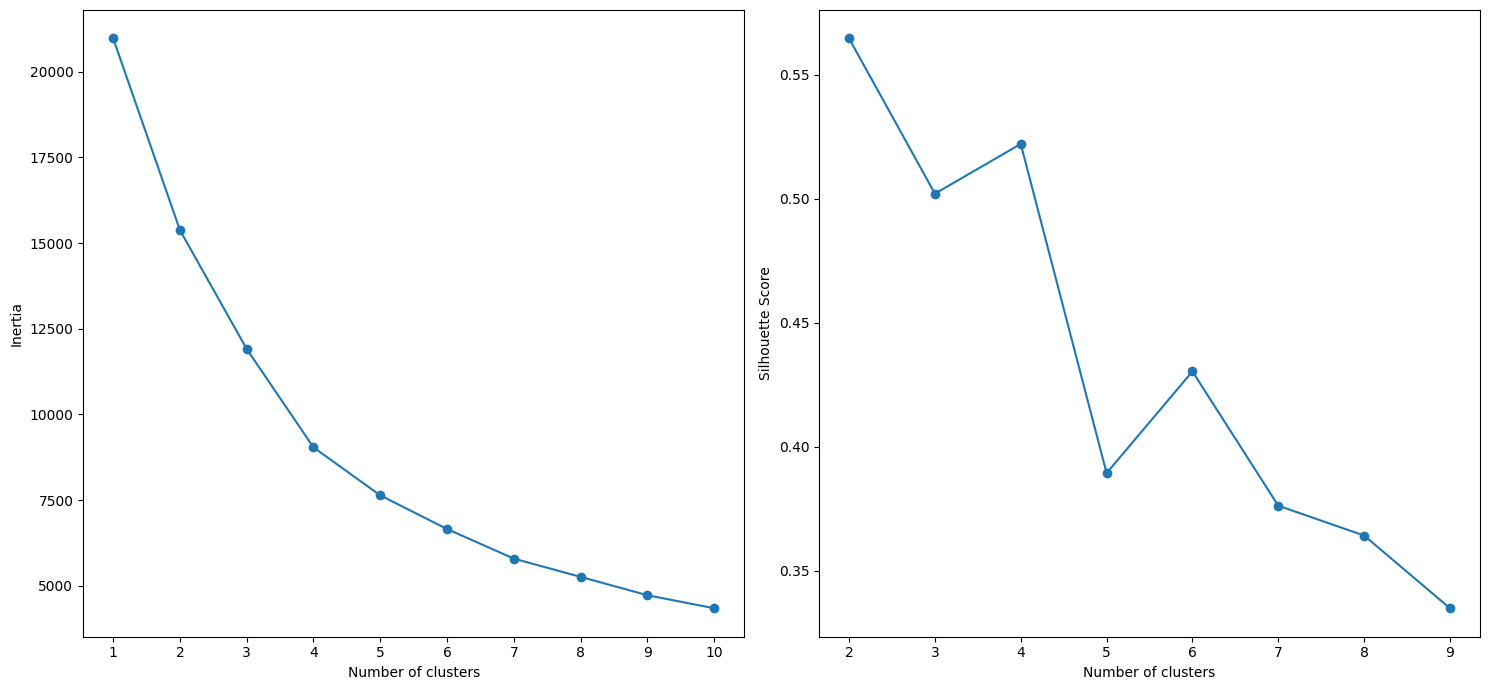

In [178]:
fig, axes = plt.subplots(1,2, figsize=(15, 7))

# elbow method
inertias = [] # empty list

for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    inertias.append(km.inertia_)

axes[0].plot(range(1, 11), inertias, marker='o')
axes[0].set_xlabel('Number of clusters')
axes[0].set_ylabel('Inertia')
axes[0].set_xticks(range(1,11))

# evaluate using silhouette score
silhouette_scores = []

for i in range(2,10):
    kmeans = KMeans(n_clusters=i, 
                    init='k-means++', 
                    n_init=10, 
                    max_iter=300, 
                    random_state=0)
    cluster_labels = kmeans.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

axes[1].plot(range(2,10), silhouette_scores, marker='o')
axes[1].set_xlabel('Number of clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_xticks(range(2,10))

plt.tight_layout()
plt.show()

In [179]:
# cluster again
km = KMeans(n_clusters=4, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
km.fit(X)
y_km = km.predict(X)

In [181]:
train.loc[:, 'cluster'] = km.labels_

/tmp/ipykernel_14363/2306674563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.loc[:, 'cluster'] = km.labels_


In [190]:
df_map = train[['latitude', 'longitude', 'price', 'cluster']]
cluster_price = df_map.groupby('cluster').price.mean().reset_index()
cluster_lat = df_map.groupby('cluster').latitude.mean().reset_index()
cluster_long = df_map.groupby('cluster').longitude.mean().reset_index()

In [195]:
cluster_lat


,cluster,latitude
0,0,-37.962660
1,1,-37.815625
2,2,-37.708953
3,3,-37.831013


In [199]:
cluster_overview = cluster_price.merge(right=cluster_lat, on='cluster')
cluster_overview = cluster_overview.merge(right=cluster_long, on='cluster')
cluster_overview

,cluster,price,latitude,longitude
0,0,201.514828,-37.962660,145.215619
1,1,186.976350,-37.815625,144.967935
2,2,292.835616,-37.708953,145.492496
3,3,965.656604,-37.831013,145.054227


In [185]:
df_map.loc[(df_map.cluster == 0) | (df_map.cluster == 1) | (df_map.cluster == 2) | (df_map.cluster == 3)]

,latitude,longitude,price,cluster
0,-37.82030,144.99016,132.0,1
1,-37.76606,144.97951,39.0,1
2,-37.90546,145.39447,270.0,0
3,-37.82163,144.96672,1000.0,3
4,-38.05725,145.33936,116.0,0
...,...,...,...,...
6995,-37.89420,145.03610,341.0,1
6996,-37.82263,144.96307,254.0,1
6997,-37.75577,144.92591,179.0,1
6998,-37.80003,144.97943,380.0,1


In [169]:
#filter for high prices 
high_price = train.price.sort_values(ascending=False).head(25).to_list()
train.loc[train.price.isin(high_price)]

,ID,source,name,description,neighborhood_overview,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price,cluster
665,665,city scrape,Funky Collingwood Studio!,Sleeps 3<br />A refurbished self-contained stu...,Located in Upper Collingwood on the City fring...,Amanda,2014-12-10,NaN,NaN,within an hour,100%,100%,t,Collingwood,1.0,"['email', 'phone']",t,t,"Collingwood, Victoria, Australia",Yarra,-37.79515,144.98534,Entire guesthouse,Entire home/apt,3,1 bath,NaN,2.0,"[""Extra pillows and blankets"", ""Laundromat nea...",2,1125,2.0,4,1125,1125.0,2.0,1125.0,t,1,1,9,249.0,275,61,6,2015-10-25,2023-03-04,4.83,4.85,4.85,4.96,4.97,4.93,4.78,t,1,1,0,0,3.06,55419.0,2
944,944,city scrape,Villa Alena,"Boutique lodge on a quiet, leafy street in Hea...",Healesville is a focal point for regional food...,Helen,2015-12-17,NaN,NaN,within an hour,100%,NaN,f,NaN,1.0,"['email', 'phone']",t,f,"Healesville, Victoria, Australia",Yarra Ranges,-37.66871,145.52918,Entire villa,Entire home/apt,10,5 baths,5.0,6.0,"[""Essentials"", ""Smoke alarm"", ""Pool"", ""Hair dr...",1,1125,1.0,1,1125,1125.0,1.0,1125.0,t,0,0,13,287.0,46,0,0,2016-01-11,2017-11-12,4.93,4.82,4.91,4.84,4.89,4.90,4.81,f,1,1,0,0,0.53,2500.0,0
1137,1137,city scrape,Healesville Garden Grandview (10 Bdrms/22 Guests),Healesville Boutique Accommodation for up to 2...,NaN,Michelle,2016-03-29,NaN,NaN,within an hour,100%,98%,f,NaN,7.0,"['email', 'phone']",t,t,NaN,Yarra Ranges,-37.65557,145.51727,Entire home,Entire home/apt,16,9.5 baths,10.0,13.0,"[""Microwave"", ""Coffee"", ""Outdoor furniture"", ""...",2,30,1.0,2,30,30.0,2.0,30.0,t,19,41,66,269.0,44,15,0,2016-06-20,2023-02-10,4.89,4.91,4.91,4.95,4.89,4.98,4.57,f,7,7,0,0,0.54,2206.0,0
1327,1327,previous scrape,Albert Rd,It is hard to believe that you are so close to...,NaN,Luxico,2014-02-03,Australia,LUXICO - the home hotel. Australia's best vill...,within a day,80%,64%,f,South Melbourne,71.0,"['email', 'phone']",t,t,NaN,Port Phillip,-37.83706,144.96252,Entire home,Entire home/apt,10,3 baths,5.0,5.0,"[""Essentials"", ""Dishwasher"", ""Stove"", ""Hair dr...",1,21,1.0,7,21,21.0,7.0,21.0,t,0,0,0,0.0,3,0,0,2018-01-20,2019-12-30,4.00,5.00,4.00,4.67,5.00,5.00,4.33,f,47,47,0,0,0.05,3540.0,0
1901,1901,city scrape,"Stunning European home, tennis court and pool",THIS HOME IS ONLY AVAILABLE FOR pHOTO SHOOTS A...,A stunning leafy suburb close to the city with...,Tania,2017-03-29,"Toorak, Australia",NaN,a few days or more,33%,NaN,f,NaN,1.0,"['email', 'phone']",t,t,"Toorak, Victoria, Australia",Stonnington,-37.83787,145.01370,Entire home,Entire home/apt,10,5 baths,5.0,9.0,"[""Extra pillows and blankets"", ""Microwave"", ""H...",7,1125,7.0,7,1125,1125.0,7.0,1125.0,t,22,52,82,357.0,2,0,0,2017-11-28,2018-08-02,0.00,NaN,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0,0.03,2400.0,0
2049,2049,city scrape,Beautiful big home in South Melbourne,A lovely family home in the heart of South Mel...,"Brilliant location close to Albert Park Lake, ...",Chris,2013-07-04,"Victoria, Australia",We love to meet and host pe

In [98]:
#pip install folium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.3/102.3 kB 485.5 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
##plotting on map
#import folium
#from folium import Choropleth, Circle, Marker
#from folium.plugins import HeatMap, MarkerCluster

In [102]:
# Create a map
#city_train = folium.Map(location=[-37.827168, 145.031142], tiles='Stamen Toner', zoom_start=12)

In [1]:
#for i in range(0,len(df)):
#    lat=df["latitude"][i]
#    long=df["longitude"][i]
#    folium.Marker(
#    [lat, long], ).add_to(city_train)
#city_train

In [ ]:
# types of variables / features
vtypes = df.dtypes.to_frame()
#vtypes.value_counts()
vtypes

In [ ]:
# data summary and characteristics
df.describe()

In [ ]:
# missing values total
total_miss = df.isna().sum()
total_miss.to_frame()
total_miss = total_miss.reset_index()
total_miss.rename(columns={0:"total"}, inplace=True)
#total_miss.loc[total_miss["total"] > 0]

In [ ]:
# missing values train
train_miss = train.isna().sum()
train_miss.to_frame()
train_miss = train_miss.reset_index()
train_miss.rename(columns={0:"train"}, inplace=True)
#train_miss.loc[train_miss["train"] > 0]

In [ ]:
# missing values test
test_miss = test.isna().sum()
test_miss.to_frame()
test_miss = test_miss.reset_index()
test_miss.rename(columns={0:"test"}, inplace=True)
#test_miss.loc[test_miss["test"] > 0]

In [ ]:
df.columns[df.isnull().any()]

In [ ]:
train.columns[train.isnull().any()]

In [ ]:
test.columns[test.isnull().any()]

In [ ]:
train_miss.set_index("index", drop=True, inplace=True)
test_miss.set_index("index", drop=True, inplace=True)
total_miss.set_index("index", drop=True, inplace=True)
train_miss.join([test_miss, total_miss])

`(Task 1, Text Here)`
### Forecasting Problem
The goal is to predict daily rental prices of Melbourne located AirBnB listings. This information could be used, for example, to assess the rental price a property with specific characteristics in certain suburbs is expected to yield. Especially in a business case scenario, where these cashflows might be used to pay off debt, this is a critical aspect for feasability assessment. In addition, people interested in building properties specifically for renting them on the platform would want to know which property characteristics lead to the highest prices and the analysis of the data reveals such patterns.

### Evaluation Criteria
The criteria to assess prediction performance is RMSE. This performance metric measures the average distance between predictions obtained by a model and actual target values. Thus, the lower the distance (and the smaller RMSE), the better the prediction quality. It also has the advantage of being in the same unit as the predicted variable which makes it easy to interpret.

### Types of Variables / Features
The 61 variables consist of various types which can be categorised as follows.
#### Categorical
##### Nominal
source  
name  
description  
neighborhood_overview  
host_name  
host_location  
host_about  
host_is_superhost  
host_neighbourhood  
host_verifications  
host_has_profile_pic  
host_identity_verified  
neighbourhood  
neighbourhood_cleansed  
amenities  
has_availability  
number_of_reviews_l30d  
instant_bookable  

##### Ordinal
host_response_time  
property_type  
room_type  


#### Numerical
ID  
host_since  
host_response_rate  
host_acceptance_rate  
host_listings_count  
latitude  
longitude  
accommodates  
bathrooms  
bedrooms  
beds  
minimum_nights  
maximum_nights  
minimum_minimum_nights  
maximum_minimum_nights  
minimum_maximum_nights  
maximum_maximum_nights  
minimum_nights_avg_ntm  
maximum_nights_avg_ntm  
availability_30  
availability_60  
availability_90  
availability_365  
number_of_reviews  
number_of_reviews_ltm  
first_review  
last_review  
review_scores_rating  
review_scores_accuracy  
review_scores_cleanliness  
review_scores_checkin  
review_scores_communication  
review_scores_location  
review_scores_value  
calculated_host_listings_count  
calculated_host_listings_count_entire_homes  
calculated_host_listings_count_private_rooms  
calculated_host_listings_count_shared_rooms  
reviews_per_month  
price  

### Data Summary and Main Data Characteristics
This dataset contains all relevant information and characteristics of Airbnb listings.

### Missing Values



---

## Task 2: Data Cleaning, Missing Observations and Feature Engineering {-}
- In this task you will follow a set of instructions/questions listed below.
- Make sure you **explain** each step you do both in Markdown text and on your video.
    - Do not just read out your commands without explaining what they do and why you used them 

Total Marks: 12

**Task 2, Question 1**: Clean **all** numerical features and the target variable `price` so that they can be used in training algorithms. For instance, `host_response_rate` feature is in object format containing both numerical values and text. Extract numerical values (or equivalently eliminate the text) so that the numerical values can be used as a regular feature.  
(2 marks)

In [ ]:
## Task 2, Question 1 Code Here
# convert host response rate to decimal
df.host_response_rate = df.host_response_rate.str.rstrip('%').astype('float') / 100

For the variable `host_response_rate`, the percentage values (which are in string format) are converted to decimals by stripping away the percentage sign and converting the value to a float subsequently.

In [ ]:
# convert host acceptance rate to decimal
df.host_acceptance_rate = df.host_acceptance_rate.str.rstrip('%').astype('float') / 100

For the variable `host_acceptance_rate`, the percentage values (which are in string format) are converted to decimals by stripping away the percentage sign and converting the value to a float subsequently.

In [ ]:
# remove strings from bathroom variable
df.bathrooms = pd.to_numeric(df.bathrooms.str.replace(r'[^0-9\.]', ''), errors='coerce')

For the variable `bathrooms`, the values consist of a number and a string. Hence the strings are stripped away using regular expressions and the remaining values are converted to float. Because there were empty values which resulted in an error when converting to float, the errors parameter was used while converting to make sure these values would be set to NaN instead.

In [ ]:
# remove dollar sign from price
df.price = df.price.str.replace('$', '', regex=True).str.replace(',', '', regex=True).astype('float')

The variable `price` contained dollar signs and commas and was also not in numerical format. Hence these issues have been fixed using with the `str.replace` method.

**Task 2, Question 2** Create at least 4 new features from existing features which contain multiple items of information, e.g. creating `email`,  `phone`, `work_email`, etc. from feature `host_verifications`.  
(2 marks)

In [ ]:
# create column sum of amenities
#df8 = pd.read_csv("df_7.csv")
## convert column values to list
#df8.amenities = df8.amenities.str.strip('][').str.replace('"', '').str.split(', ')
#
## create new column with sum of items in each list
#df8["sum_amenities"] = df8.amenities.apply(lambda x: len(x))
#
#df8.drop(['amenities'], axis=1, inplace=True)

In [ ]:
#df8.to_csv("df_8.csv")

`(Task 2, Question 2 Text Here)`

**Task 2, Question 3**: Impute missing values for all features in both training and test datasets. Hint: make sure you do **not** impute the price in the test dataset.
(3 marks)

In [ ]:
## Task 2, Question 3 Code Here

`(Task 2, Question 3 Text Here)`

**Task 2, Question 4**: Encode all categorical variables appropriately as discussed in class. 


Where a categorical feature contains more than 5 unique values, map the feature into 5 most frequent values + 'other' and then encode appropriately. For instance, you could group then map `property_type` into 5 most frequent property types + 'other'  
(2 marks)

In [ ]:
## Task 2, Question 4 Code Here

`(Task 2, Question 4 Text Here)`

**Task 2, Question 5**: Perform any other actions you think need to be done on the data before constructing predictive models, and clearly explain what you have done.   
(1 marks)

In [ ]:
# feature scaling

`(Task 2, Question 5 Text Here)`

**Task 2, Question 6**: Perform exploratory data analysis to measure the relationship between the features and the target and write up your findings. 
(2 marks)

In [ ]:
df9 = pd.read_csv("df_7.csv")
df9.drop(["latitude", "longitude", "source_previous scrape"], axis=1, inplace=True)
df9.to_csv("df_9.csv")

In [ ]:
df9.head()

In [ ]:
df9.describe()

In [ ]:
df9.columns

#### Univariate EDA

In [ ]:
df9[['host_since', 'host_response_rate',
       'host_acceptance_rate', 'host_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights',
       'maximum_nights', #'availability_30', 'availability_60',
       #'availability_90', 'availability_365', 
     'review_scores_rating', 'price',
       #'email', 'phone', 'work_email', 'smoke_alarm', 'kitchen', 'essentials', 'hangers', 'wifi', 'host_is_superhost_t', 'host_has_profile_pic_t',
       #'host_identity_verified_t', 'has_availability_t', 'instant_bookable_t',
       #'property_type', 'neighbourhood_cleansed', 
     'log_price',
       'amenity_count']].plot.box(vert = False, grid = True);

price heavily influences the overall picture.

In [ ]:
df9[['host_since', 'host_response_rate',
       'host_acceptance_rate', 'host_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights',
       'maximum_nights', #'availability_30', 'availability_60',
       #'availability_90', 'availability_365', 
     'review_scores_rating', #'price',
       #'email', 'phone', 'work_email', 'smoke_alarm', 'kitchen', 'essentials', 'hangers', 'wifi', 'host_is_superhost_t', 'host_has_profile_pic_t',
       #'host_identity_verified_t', 'has_availability_t', 'instant_bookable_t',
       #'property_type', 'neighbourhood_cleansed', 
     'log_price',
       'amenity_count']].plot.box(vert = False, grid = True);

Still a few distortions, let's look at the variables with large magnitude only.

In [ ]:
df9[['host_since', #'host_response_rate',
       #'host_acceptance_rate', 'host_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 
     'minimum_nights', 'maximum_nights', #'availability_30', 'availability_60',
       #'availability_90', 'availability_365', 
     #'review_scores_rating', #'price',
       #'email', 'phone', 'work_email', 'smoke_alarm', 'kitchen', 'essentials', 'hangers', 'wifi', 'host_is_superhost_t', 'host_has_profile_pic_t',
       #'host_identity_verified_t', 'has_availability_t', 'instant_bookable_t',
       #'property_type', 'neighbourhood_cleansed', 
     #'log_price', 'amenity_count'
    ]].plot.box(vert = False, grid = True);

In [ ]:
df9[[#'host_since', #'host_response_rate',
       #'host_acceptance_rate', 'host_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 
     'minimum_nights', 'maximum_nights', #'availability_30', 'availability_60',
       #'availability_90', 'availability_365', 
     #'review_scores_rating', #'price',
       #'email', 'phone', 'work_email', 'smoke_alarm', 'kitchen', 'essentials', 'hangers', 'wifi', 'host_is_superhost_t', 'host_has_profile_pic_t',
       #'host_identity_verified_t', 'has_availability_t', 'instant_bookable_t',
       #'property_type', 'neighbourhood_cleansed', 
     #'log_price', 'amenity_count'
    ]].plot.box(vert = False, grid = True);

It is clear that there a few listings which have extremely large minimum nights restrictions. Let's have a look.

In [ ]:
df9.loc[df9.minimum_nights > 150]

Now let's look at variables with lower magnitude.

In [ ]:
df9[[#'host_since', 
    'host_response_rate', 'host_acceptance_rate', #'host_listings_count', 
    'accommodates', 'bathrooms', 'bedrooms', 'beds', #'minimum_nights',
       #'maximum_nights', 
    #'availability_30', 'availability_60', 'availability_90', 'availability_365', 
     'review_scores_rating', #'price',
       #'email', 'phone', 'work_email', 'smoke_alarm', 'kitchen', 'essentials', 'hangers', 'wifi', 'host_is_superhost_t', 'host_has_profile_pic_t',
       #'host_identity_verified_t', 'has_availability_t', 'instant_bookable_t',
       'property_type', 'neighbourhood_cleansed', 
     'log_price',
       'amenity_count']].plot.box(vert = False, grid = True);

In [ ]:
df9[[#'host_since', 
    'host_response_rate', 'host_acceptance_rate', #'host_listings_count', 
    'accommodates', 'bathrooms', 'bedrooms', 'beds', #'minimum_nights',
       #'maximum_nights', 
    #'availability_30', 'availability_60', 'availability_90', 'availability_365', 
     'review_scores_rating', #'price',
       #'email', 'phone', 'work_email', 'smoke_alarm', 'kitchen', 'essentials', 'hangers', 'wifi', 'host_is_superhost_t', 'host_has_profile_pic_t',
       #'host_identity_verified_t', 'has_availability_t', 'instant_bookable_t',
       'property_type', 'neighbourhood_cleansed', 
     'log_price',
       #'amenity_count'
]].plot.box(vert = False, grid = True);

In [ ]:
df9[[#'host_since', 
    'host_response_rate', #'host_acceptance_rate', #'host_listings_count', 
    #'accommodates', 'bathrooms', 'bedrooms', 'beds', #'minimum_nights',
       #'maximum_nights', 
    #'availability_30', 'availability_60', 'availability_90', 'availability_365', 
     #'review_scores_rating', #'price',
       #'email', 'phone', 'work_email', 'smoke_alarm', 'kitchen', 'essentials', 'hangers', 'wifi', 'host_is_superhost_t', 'host_has_profile_pic_t',
       #'host_identity_verified_t', 'has_availability_t', 'instant_bookable_t',
      # 'property_type', 'neighbourhood_cleansed', 
     #'log_price',
       #'amenity_count'
]].plot.box(vert = False, grid = True);

In [ ]:
df9.loc[df9.host_response_rate < 0.2].price.mean()

In [ ]:
df9.loc[df9.host_response_rate >= 0.2].price.mean()

In [ ]:
df9[[#'host_since', 
    #'host_response_rate', 'host_acceptance_rate', #'host_listings_count', 
    'accommodates', #'bathrooms', 'bedrooms', 'beds', #'minimum_nights',
       #'maximum_nights', 
    #'availability_30', 'availability_60', 'availability_90', 'availability_365', 
     'review_scores_rating', #'price',
       #'email', 'phone', 'work_email', 'smoke_alarm', 'kitchen', 'essentials', 'hangers', 'wifi', 'host_is_superhost_t', 'host_has_profile_pic_t',
       #'host_identity_verified_t', 'has_availability_t', 'instant_bookable_t',
       #'property_type', 'neighbourhood_cleansed', 
     'log_price',
       #'amenity_count'
]].plot.density();

In [ ]:
df9[[#'host_since', 
    #'host_response_rate', 'host_acceptance_rate', #'host_listings_count', 
    #'accommodates', 
    'bathrooms', #'bedrooms', 'beds', #'minimum_nights',
       #'maximum_nights', 
    #'availability_30', 'availability_60', 'availability_90', 'availability_365', 
     #'review_scores_rating', #'price',
       #'email', 'phone', 'work_email', 'smoke_alarm', 'kitchen', 'essentials', 'hangers', 'wifi', 'host_is_superhost_t', 'host_has_profile_pic_t',
       #'host_identity_verified_t', 'has_availability_t', 'instant_bookable_t',
       #'property_type', 'neighbourhood_cleansed', 
     #'log_price',
       #'amenity_count'
]].plot.density();

In [ ]:
df9[[#'host_since', 
    #'host_response_rate', 'host_acceptance_rate', #'host_listings_count', 
    #'accommodates', 
    #'bathrooms', 
    'bedrooms', #'beds', #'minimum_nights',
       #'maximum_nights', 
    #'availability_30', 'availability_60', 'availability_90', 'availability_365', 
     #'review_scores_rating', #'price',
       #'email', 'phone', 'work_email', 'smoke_alarm', 'kitchen', 'essentials', 'hangers', 'wifi', 'host_is_superhost_t', 'host_has_profile_pic_t',
       #'host_identity_verified_t', 'has_availability_t', 'instant_bookable_t',
       #'property_type', 'neighbourhood_cleansed', 
     #'log_price',
       #'amenity_count'
]].plot.density();

In [ ]:
df9[[#'host_since', 
    #'host_response_rate', 'host_acceptance_rate', #'host_listings_count', 
    #'accommodates', 
    #'bathrooms', 
    #'bedrooms', 
    'beds', #'minimum_nights',
       #'maximum_nights', 
    #'availability_30', 'availability_60', 'availability_90', 'availability_365', 
     #'review_scores_rating', #'price',
       #'email', 'phone', 'work_email', 'smoke_alarm', 'kitchen', 'essentials', 'hangers', 'wifi', 'host_is_superhost_t', 'host_has_profile_pic_t',
       #'host_identity_verified_t', 'has_availability_t', 'instant_bookable_t',
       #'property_type', 'neighbourhood_cleansed', 
     #'log_price',
       #'amenity_count'
]].plot.density();

#### Bivariate EDA

##### Correlation Matrix

In [ ]:
corr = df9[['host_since', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_listings_count', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights',
       'maximum_nights', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'email', 'phone', 'work_email',
       'amenity_count', 'smoke_alarm', 'kitchen', 'essentials', 'hangers',
       'wifi', 'host_is_superhost_t', 'host_has_profile_pic_t',
       'host_identity_verified_t', 'has_availability_t', 'instant_bookable_t',
       'property_type', 'neighbourhood_cleansed', 'price', 'log_price']].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

##### Interpretation
`host_since, host_response_time, host_response_rate, host_acceptance_rate, and host_listings_count`\
do not seem related to any other variables. Likely that they should be dropped.\
`Room Type`\
negative correlation of -0.49 with log price --> larger rooms are encoded with smaller integers. Hence correlation indicates that large / more private room types correlate with higher prices. Interestingly the relationship becomes irrelevant for non-log prices.\
`accommodates, bathrooms, bedrooms, beds`\
very strong correlation. This has to be analysed further to avoid multicollinearity down the line. accommodates and bedrooms have strongest positive correlation with log price out of those four.\
`minimum_nights and maximum_nights`\
do not seem related to any other variables. Likely that they should be dropped.\
`availability_30, availability_60, availability_90, and availability_365`\
There seems to be some relation with log price. Out of those, availability_30 seems to have strongest relation. Others should likely be dropped due to multicollinearity.\
`review_scores_rating, email, phone, work_email, smoke_alarm, kitchen, essentials, hangers, wifi, host_is_superhost_t, host_has_profile_pic_t, host_identity_verified_t, and has_availability_t`\
These seem all unrelated to both log price and price.\
`instant_bookable_t, property_type, neighbourhood_cleansed, and sum_amenities`\
These seem to have weak but existent relationship with log prices. instant_bookable and sum_amenities are positively related while property_type and neighbourhood_cleansed have a negative relationship. Thus, for property types the same logic applies as for room types and they might capture similar information. In the case of neighbourhood_cleansed it implies that the more listings exist in a suburb in the data, the higher its prices seem to be. Even though this is probably a weak relationship, but due to the construction of the neighbourhood encoding it seems to be the case. Further analysis is required with respect to individual suburbs as predictors of price.

NOTE: All correlations of prices with categorical data should be taken cautiously as the pearson correlation coefficient might not be suitable for those variables.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 15))
# Plotting the heatmap with respect to the correlation of the features with the target variable
sns.heatmap(df9.corr()[['log_price']].sort_values(by='log_price', ascending=False), annot=True, cmap='viridis');

In [ ]:
#continuous_features = [col for col in data.columns if data[col].dtype != 'O']
#for col in continuous_features:
#      data_copy = data.copy()
#      if 0 in data_copy[col].unique():
#            pass
#       else:
#            data_copy[col] = np.log(data_copy[col])
#            data_copy['SalePrice'] = np.log(data_copy['SalePrice'])
#            plt.scatter(data_copy[col], data_copy['SalePrice'])
#            plt.xlabel(col)
#            plt.ylabel('SalePrice')

##### Price vs Room Type

In [ ]:
df9.groupby('room_type').price.mean()

In [ ]:
import seaborn as sns

sns.scatterplot(x="room_type", y="price", data=df9, hue="room_type");

In [ ]:
sns.scatterplot(x="room_type", y="price", data=df9.loc[df9.price < 5000]);

In [ ]:
sns.violinplot(x="room_type", y="price", data=df9, hue="room_type");

In [ ]:
df9.room_type.value_counts()

In [ ]:
train = df9.iloc[0:7000,]
test = df9.iloc[7000:,]

In [ ]:
print(train.room_type.value_counts(normalize=True))
print(test.room_type.value_counts(normalize=True))

For room type 0 and 2 there seem to be a few outliers that skew the results of the mean prices in these groups. Also room types 1 and 3 are heavily underrepresented in the data across both training and test data.

##### Price vs accommodates

In [ ]:
df9.groupby('accommodates').price.mean()

In [ ]:
sns.scatterplot(x="accommodates", y="price", data=df9);

In [ ]:
sns.scatterplot(x="accommodates", y="price", data=df9.loc[df9.price < 5000]);

In [ ]:
sns.violinplot(x="accommodates", y="price", data=df9);

In [ ]:
df9.accommodates.value_counts(normalize=True)

In [ ]:
print(train.accommodates.value_counts(normalize=True))
print(test.accommodates.value_counts(normalize=True))

##### Price vs Bathrooms

In [ ]:
df9.groupby('bathrooms').price.mean()

In [ ]:
sns.scatterplot(x="bathrooms", y="price", data=df9);

In [ ]:
sns.scatterplot(x="bathrooms", y="price", data=df9.loc[df9.price < 5000]);

In [ ]:
df9.loc[df9.price > 100000]

In [ ]:
df9.bathrooms.value_counts(normalize=True)

##### Price vs Bedrooms

In [ ]:
df9.groupby('bedrooms').price.mean()

In [ ]:
sns.scatterplot(x="bedrooms", y="price", data=df9);

In [ ]:
sns.scatterplot(x="bedrooms", y="price", data=df9.loc[df9.price < 5000]);

In [ ]:
sns.violinplot(x="bedrooms", y="price", data=df9);

In [ ]:
df9.bedrooms.value_counts(normalize=True)

##### Price vs availability

In [ ]:
sns.scatterplot(x="availability_30", y="price", data=df9);

In [ ]:
sns.scatterplot(x="availability_30", y="price", data=df9.loc[df9.price < 5000]);

##### Price vs sum_amenities

In [ ]:
sns.scatterplot(x="amenity_count", y="price", data=df9.loc[df9.price < 5000]);

`(Task 2, Question 6 Text Here)`

--- 
## Task 3: Fit and tune a forecasting model/Submit predictions/Report score and ranking {-}

Make sure you **clearly explain each step** you do, both in text and on the recoded video.

1. Build a machine learning (ML) regression model by taking into account the outcomes of Tasks 1 & 2 (Explain carefully)
2. Fit the model and tune hyperparameters via cross-validation: make sure you comment and explain each step clearly
3. Create predictions using the test dataset and submit your predictions on Kaggle's competition page
4. Provide Kaggle ranking and **score** (screenshot your best submission) and Comment
5. Make sure your Python code works, so that a marker that can replicate your all of your results and obtain the same RMSE from Kaggle

- Hint: to perform well in this assignment you will need to iterate Tasks 2 & 3, creating new features and training various models in order to find the best one.

Total Marks: 12

In [ ]:
df9 = pd.read_csv("df_9.csv")
test_ids = df9.ID.iloc[7000:].values # save IDs for later output
df9.drop(["Unnamed: 0", "ID", 'price', 'host_has_profile_pic_t','host_identity_verified_t'], axis=1, inplace=True)
y_train = df9['log_price'].iloc[:7000].values
#y_test = np.zeros(3000)
X_train = df9.drop(['log_price'], axis=1).iloc[:7000].values
X_test = df9.drop(['log_price'], axis=1).iloc[7000:].values

### Predictions after brute force missing value imputation

#### Random Forest Regressor

In [ ]:
#df9 = df9.head(7000)
#y = df9['log_price'].values.ravel()
#ts = 0.30; rs = 10
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = ts, random_state = rs, stratify=None)

pipe_rf = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=42))

pipe_rf.fit(X_train, y_train)

n_folds = 10
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

cv_scores = -cross_val_score(pipe_rf, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

mse = np.mean(cv_scores)
rmse = np.sqrt(mse)
print("CV Root Mean Squared Error:", rmse)

pipe_rf.fit(X_train, y_train)


y_pred = pipe_rf.predict(X_test)
y_pred_dollar = np.exp(y_pred)
#mse = mean_squared_error(y_test, y_pred)
#rmse = np.sqrt(mse)
#print("Root Mean Squared Error:", rmse)

# calculate RMSE in original scale
#y_pred_dollar = np.exp(y_pred)
#y_test_dollar = np.exp(y_test)
#
#rmse = np.sqrt(mean_squared_error(y_test_dollar, y_pred_dollar))
#print(f'Root Mean Squared Error in AUD: {rmse}')

In [ ]:
#ts = 0.30; rs = 10
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = ts, random_state = rs, stratify=None)

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error


pipe_rf = make_pipeline(RandomForestRegressor(random_state=42))

pipe_rf.fit(X_train, y_train)

n_folds = 20
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

cv_scores = -cross_val_score(pipe_rf, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

mse = np.mean(cv_scores)
rmse = np.sqrt(mse)
print("CV Root Mean Squared Error:", rmse)

pipe_rf.fit(X_train, y_train)


y_pred = pipe_rf.predict(X_test)
y_pred_dollar = np.exp(y_pred)

In [ ]:
y_pred_dollar

In [ ]:
y_pred.shape

In [ ]:
# save predictions to csv
out = pd.DataFrame({"ID":test_ids, "price":y_pred_dollar})
out.to_csv("RandomForestPredictions.csv", index=False, header=True)

In [ ]:
out

In [ ]:
df9.iloc[7000:,]

#### Random Forest Regressor Grid Search

In [ ]:
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# first let's do randomized grid search to narrow down parameter ranges
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 100)]
# Number of features to consider at every split
max_features = [1.0, 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(2, 20, num = 10)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(1, 20, num = 10)]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# sample size per bootstrap sample
max_samples = [x for x in np.linspace(0.1, 1, num = 10)]
# Create the random grid
random_grid = {'randomforestregressor__n_estimators': n_estimators,
               'randomforestregressor__max_features': max_features,
               'randomforestregressor__max_depth': max_depth,
               'randomforestregressor__min_samples_split': min_samples_split,
               'randomforestregressor__min_samples_leaf': min_samples_leaf,
               'randomforestregressor__bootstrap': bootstrap,
               'randomforestregressor__max_samples': max_samples}
pprint(random_grid)

In [ ]:
pipe = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=42))

gs_random = RandomizedSearchCV(estimator = pipe, 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = 10,  
                               n_jobs = -1,
                               scoring = 'neg_mean_squared_error')
# Fit the random search model
gs_random.fit(X_train, y_train)
print(gs_random.best_estimator_)
print(gs_random.best_params_)
print(gs_random.best_score_)


In [ ]:
# narrow down optimal parameter values
from sklearn.model_selection import GridSearchCV
pipe = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=42))
# Create the parameter grid based on the results of random search 
param_grid = {
    'randomforestregressor__bootstrap': [True],
    'randomforestregressor__max_depth': [50, 55],
    'randomforestregressor__max_features': [0.9, 1.0],
    'randomforestregressor__max_samples': [0.85, 0.9],
    'randomforestregressor__min_samples_leaf': [2, 3],
    'randomforestregressor__min_samples_split': [6, 8],
    'randomforestregressor__n_estimators': [1300, 1400]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = pipe, 
                           param_grid = param_grid, 
                           cv = 10, 
                           n_jobs = -1,
                           scoring = 'neg_mean_squared_error')

# Fit the random search model
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(best_model)
print(best_params)

In [ ]:
# narrow down parameter values again
from sklearn.model_selection import GridSearchCV
pipe = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=42))
# Create the parameter grid based on the results of random search 
param_grid = {
    'randomforestregressor__bootstrap': [True],
    'randomforestregressor__max_depth': [45, 50],
    'randomforestregressor__max_features': [0.85, 0.90],
    'randomforestregressor__max_samples': [0.80, 0.85],
    'randomforestregressor__min_samples_leaf': [3, 4],
    'randomforestregressor__min_samples_split': [5, 6],
    'randomforestregressor__n_estimators': [1400, 1500]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = pipe, 
                           param_grid = param_grid, 
                           cv = 10, 
                           n_jobs = -1,
                           scoring = 'neg_mean_squared_error')

# Fit the random search model
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(best_model)
print(best_params)

In [ ]:
# narrow down parameter values again
from sklearn.model_selection import GridSearchCV
pipe = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=42))
# Create the parameter grid based on the results of random search 
param_grid = {
    'randomforestregressor__bootstrap': [True],
    'randomforestregressor__max_depth': [35, 40, 45],
    'randomforestregressor__max_features': [0.75, 0.80, 0.85],
    'randomforestregressor__max_samples': [0.85],
    'randomforestregressor__min_samples_leaf': [3],
    'randomforestregressor__min_samples_split': [4, 5],
    'randomforestregressor__n_estimators': [1400]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = pipe, 
                           param_grid = param_grid, 
                           cv = 10, 
                           n_jobs = -1,
                           scoring = 'neg_mean_squared_error')

# Fit the random search model
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(best_model)
print(best_params)

In [ ]:
# narrow down parameter values again
from sklearn.model_selection import GridSearchCV
pipe = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=42))
# Create the parameter grid based on the results of random search 
param_grid = {
    'randomforestregressor__bootstrap': [True],
    'randomforestregressor__max_depth': [25, 30, 35],
    'randomforestregressor__max_features': [0.65, 0.70, 0.75],
    'randomforestregressor__max_samples': [0.85],
    'randomforestregressor__min_samples_leaf': [3],
    'randomforestregressor__min_samples_split': [3, 4],
    'randomforestregressor__n_estimators': [1400]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = pipe, 
                           param_grid = param_grid, 
                           cv = 10, 
                           n_jobs = -1,
                           scoring = 'neg_mean_squared_error')

# Fit the random search model
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(best_model)
print(best_params)

In [ ]:
# final model
pipe_rf = make_pipeline(RandomForestRegressor(random_state=42,
                                             max_depth=25, max_features=0.45,
                                             max_samples=0.85, min_samples_leaf=3,
                                             min_samples_split=3, n_estimators=1400,
                                             bootstrap=True))

pipe_rf.fit(X_train, y_train)

n_folds = 20
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

cv_scores = -cross_val_score(pipe_rf, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

mse = np.mean(cv_scores)
rmse = np.sqrt(mse)
print("CV Root Mean Squared Error:", rmse)

pipe_rf.fit(X_train, y_train)


y_pred = pipe_rf.predict(X_test)
y_pred_dollar = np.exp(y_pred)

In [ ]:
# save predictions to csv
out = pd.DataFrame({"ID":test_ids, "price":y_pred_dollar})
out.to_csv("RandomForestPredictions.csv", index=False, header=True)

#### ExtraTreeRegressor

### Predictions after using MissForest RandomForestClassifier & Regressor for missing values imputation

In [3]:
df10 = pd.read_csv('missforest_imputed.csv')#.reset_index(names='ID')
df10.drop(['Unnamed: 0'], axis=1, inplace=True)
df10

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_listings_count,latitude,longitude,room_type,accommodates,bathrooms,...,property_type_Private room in home,property_type_Private room in rental unit,property_type_other,neighbourhood_cleansed_Port Phillip,neighbourhood_cleansed_Stonnington,neighbourhood_cleansed_Yarra,neighbourhood_cleansed_Yarra Ranges,neighbourhood_cleansed_other,price,log_price
0,3723.0,1.00,1.0000,0.9800,2.0,-37.82030,144.99016,4.0,2.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,132.0,4.882802
1,5000.0,2.00,1.0000,0.9800,1.0,-37.76606,144.97951,3.0,2.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,39.0,3.663562
2,4197.0,2.00,1.0000,0.7800,2.0,-37.90546,145.39447,4.0,4.0,2.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,270.0,5.598422
3,4730.0,3.00,0.7500,0.9200,4.0,-37.82163,144.96672,3.0,2.0,2.5,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1000.0,6.907755
4,4701.0,2.00,1.0000,0.8700,1.0,-38.05725,145.33936,4.0,5.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,116.0,4.753590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3217.0,2.32,0.9895,0.3337,1.0,-37.82025,145.03088,3.0,2.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN
9996,1201.0,1.00,0.9728,0.9841,36.0,-37.83624,144.99299,4.0,2.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN
9997,3123.0,1.00,1.0000,0.9200,36.0,-37.86326,144.75456,4.0,16.0,3.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN
9998,1763.0,2.28,0.9342,0.4879,2.0,-37.80913,144.96058,3.0,2.0,0.5,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


#### Standardise Data

In [7]:
# check if all continuous features have more than 10 unique values
for column in df10.columns:
    if df10[column].nunique() < 10:
        print(column)

email
phone
work_email
smoke_alarm
kitchen
essentials
hangers
wifi
host_is_superhost_t
host_has_profile_pic_t
host_identity_verified_t
has_availability_t
instant_bookable_t
property_type_Entire home
property_type_Entire rental unit
property_type_Private room in home
property_type_Private room in rental unit
property_type_other
neighbourhood_cleansed_Port Phillip
neighbourhood_cleansed_Stonnington
neighbourhood_cleansed_Yarra
neighbourhood_cleansed_Yarra Ranges
neighbourhood_cleansed_other


In [4]:
test_ids = df10.index[7000:].values # save IDs for later output
#y_train = df10['log_price'].iloc[:7000].values
X_train = df10.iloc[:7000]
X_test = df10.iloc[7000:]

In [5]:
# Standardize continuous columns
# Initialize a StandardScaler object for feature standardization
scaler = StandardScaler()

X_train_std = X_train.drop(['log_price', 'price'], axis=1).copy()
X_test_std = X_test.drop(['log_price', 'price'], axis=1).copy()

# Iterate through columns
for column in X_train_std.columns:
    # Check if the column has more than 10 unique values (threshold for categorical variables)
    if X_train_std[column].nunique() > 10:
        # Fit the StandardScaler on the training data
        scaler.fit(X_train_std[column].values.reshape(-1, 1))
        # Apply feature standardization to both training and test data
        X_train_std[column] = scaler.transform(X_train_std[column].values.reshape(-1, 1))
        X_test_std[column] = scaler.transform(X_test_std[column].values.reshape(-1, 1))
        
# put prices back
X_train_std[['log_price', 'price']] = X_train[['log_price', 'price']]
X_test_std[['log_price', 'price']] = X_test[['log_price', 'price']]

In [7]:
# Normalise continuous columns
# Initialize a MinMaxScaler object for feature standardization
norm_scaler = StandardScaler()

X_train_norm = X_train.copy()
X_test_norm = X_test.copy()

# Iterate through columns
for column in X_train_norm.columns:
    # Check if the column has more than 10 unique values (threshold for categorical variables)
    if X_train_norm[column].nunique() > 10:
        # Fit the StandardScaler on the training data
        norm_scaler.fit(X_train_norm[column].values.reshape(-1, 1))
        # Apply feature standardization to both training and test data
        X_train_norm[column] = norm_scaler.transform(X_train_norm[column].values.reshape(-1, 1))
        X_test_norm[column] = norm_scaler.transform(X_test_norm[column].values.reshape(-1, 1))
        
# transform to numpy arrays
#X_train_norm = X_train_norm.values
#X_test_norm = X_test_norm.values

In [6]:
def get_outliers(data, threshold=3):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data.values.reshape(-1, 1))
    z_scores = scaled_data.flatten()
    outlier_locations = np.where(np.abs(z_scores) > threshold)[0]
    outlier_values = data[outlier_locations]
    outlier_df = pd.DataFrame({'Outlier': outlier_values})
    return outlier_df

In [7]:
# Remove price outliers
price_outlier = get_outliers(X_train_std['price'], threshold=2)
X_train_std = X_train_std[~X_train_std['price'].isin(price_outlier['Outlier'].values)]
X_train_std.reset_index(drop=True, inplace=True)

In [8]:
X_train_std.price.describe()

count    6989.000000
mean      225.994849
std       209.549952
min        25.000000
25%       116.000000
50%       172.000000
75%       267.000000
max      3571.000000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

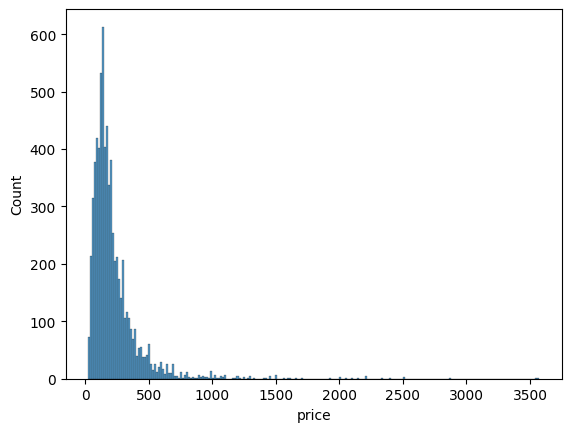

In [9]:
sns.histplot(data=X_train_std, x='price');

<Axes: xlabel='price'>

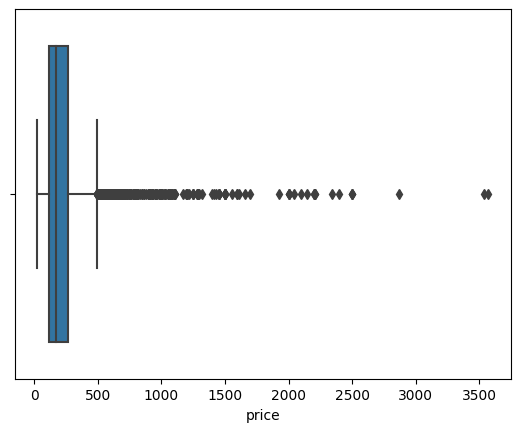

In [10]:
sns.boxplot(data=X_train_std, x='price');

In [34]:
# now again create log variable
#X_train_std.log_price = np.log(X_train_std.price)

In [11]:
test_ids = df10.index[7000:].values # save IDs for later output
y_train = X_train_std['log_price'].iloc[:7000].values
X_train_std = X_train_std.drop(['log_price', 'price'], axis=1)
X_test_std = X_test_std.drop(['log_price', 'price'], axis=1)

#### XGBoost Regressor

In [39]:
def modelfit(alg, X_train, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(X_train[predictors].values, label=y_train)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='rmse', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(X_train[predictors], y_train)
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_train[predictors])
        
    #Print model report:
    print("\nModel Report")
    print("RMSE : %.4g" % np.sqrt(mean_squared_error(y_train, dtrain_predictions)))
                    
    feat_imp = pd.Series(alg.get_booster().get_score(importance_type='weight')).sort_values(ascending=False)[:35]
    plt.subplots(figsize=(15, 12))
    feat_imp.plot.barh(title='Feature Importances')
    plt.xlabel('Feature Importance Score')
    return feat_imp


Model Report
RMSE : 0.09601


host_since                      1281.0
longitude                       1146.0
latitude                        1136.0
first_review                     819.0
availability_365                 681.0
amenity_count                    616.0
reviews_per_month                568.0
number_of_reviews                562.0
host_acceptance_rate             553.0
host_listings_count              487.0
review_scores_value              450.0
review_scores_rating             448.0
review_scores_location           410.0
availability_30                  404.0
number_of_reviews_ltm            401.0
review_scores_cleanliness        387.0
minimum_nights                   381.0
availability_90                  373.0
availability_60                  372.0
maximum_nights                   372.0
review_scores_accuracy           344.0
review_scores_checkin            326.0
review_scores_communication      314.0
accommodates                     261.0
host_response_rate               201.0
bedrooms                 

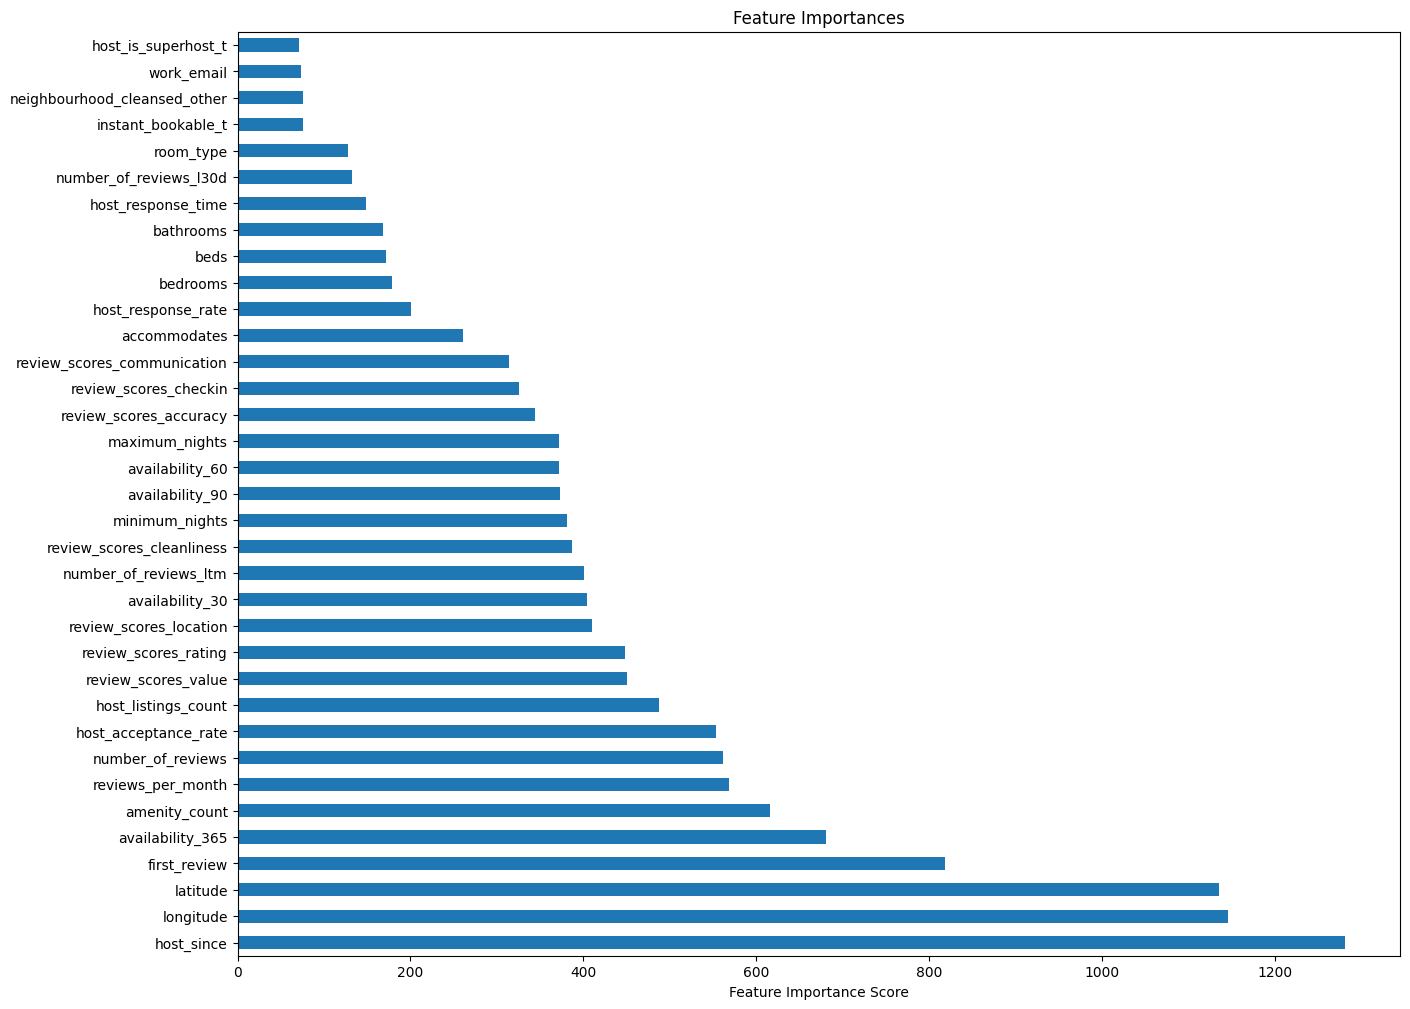

In [40]:
predictors = [x for x in X_train_std.columns]
target = y_train
xgb1 = XGBRegressor(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 eval_metric='rmse',
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 nthread=4,
 scale_pos_weight=1,
 seed=42)
modelfit(xgb1, X_train_std, predictors)

In [41]:
X_train_std.columns

Index(['host_since', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_listings_count', 'latitude', 'longitude',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'first_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month', 'email', 'phone',
       'work_email', 'amenity_count', 'smoke_alarm', 'kitchen', 'essentials',
       'hangers', 'wifi', 'host_is_superhost_t', 'host_has_profile_pic_t',
       'host_identity_verified_t', 'has_availability_t', 'instant_bookable_t',
       'property_type_Entire home', 'property_type_Entire rental unit',
       'pr

In [ ]:
# xgboost on all predictors

In [10]:
# selecting most important features
features = [
        'host_since',                 
        'longitude',                
        'latitude',                    
        'availability_365',            
        'amenity_count',               
        'host_acceptance_rate',        
        'number_of_reviews',           
        'host_listings_count',         
        'review_scores_value',         
        'number_of_reviews_ltm',       
        'review_scores_cleanliness',   
        'review_scores_rating',        
        'maximum_nights',              
        'minimum_nights',              
        'availability_30',             
        'availability_60',             
        'review_scores_location',      
        'review_scores_communication', 
        'review_scores_accuracy',      
        'availability_90',             
        'review_scores_checkin',       
        'accommodates',                
        'bedrooms',                    
        'host_response_rate',          
        #'property_type',               
        #'bathrooms',                   
        #'neighbourhood_cleansed',      
        #'beds',                        
        #'host_response_time',          
        #'number_of_reviews_l30d',      
        #'room_type'
]

X1_train = X_train_std.copy()
X1_test = X_test_std.copy()

for f in X_train_std.columns:
    if f not in features:
        X1_train.drop(columns=f, inplace=True)
        X1_test.drop(columns=f, inplace=True)

In [11]:
xgb1 = XGBRegressor(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 eval_metric='rmse',
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 nthread=4,
 scale_pos_weight=1,
 seed=42)

xgb1.fit(X1_train, y_train) # fit regressor

n_folds = 10
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

cv_scores = -cross_val_score(xgb1, X1_train, y_train, cv=kf, scoring='neg_mean_squared_error')

mse = np.mean(cv_scores)
rmse = np.sqrt(mse)
print("CV Root Mean Squared Error:", rmse)

xgb1.fit(X1_train, y_train)


y_pred = xgb1.predict(X1_test)
y_pred_dollar = np.exp(y_pred)

CV Root Mean Squared Error: 0.40739465713487705


In [12]:
# save predictions to csv
out = pd.DataFrame({"ID":test_ids, "price":y_pred_dollar})
out.to_csv("XGBRegressorPredictions.csv", index=False, header=True)

In [13]:
# selecting most important features
features = [
        'host_since',                 
        'longitude',                
        'latitude',                    
        'availability_365',            
        'amenity_count',               
        'host_acceptance_rate',        
        'number_of_reviews',           
        'host_listings_count',         
        'review_scores_value',         
        'number_of_reviews_ltm',       
        'review_scores_cleanliness',   
        'review_scores_rating',        
        'maximum_nights',              
        'minimum_nights',              
        'availability_30',             
        'availability_60',             
        'review_scores_location',      
        'review_scores_communication', 
        'review_scores_accuracy',      
        'availability_90',             
        'review_scores_checkin',       
        'accommodates',                
        'bedrooms',                    
        'host_response_rate',          
        'property_type',               
        'bathrooms',                   
        'neighbourhood_cleansed',      
        'beds',                        
        'host_response_time',          
        'number_of_reviews_l30d',      
        'room_type']

X1_train = X_train_std.copy()
X1_test = X_test_std.copy()

for f in X_train_std.columns:
    if f not in features:
        X1_train.drop(columns=f, inplace=True)
        X1_test.drop(columns=f, inplace=True)

In [14]:
xgb1 = XGBRegressor(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 eval_metric='rmse',
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 nthread=4,
 scale_pos_weight=1,
 seed=42)

xgb1.fit(X1_train, y_train) # fit regressor

n_folds = 10
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

cv_scores = -cross_val_score(xgb1, X1_train, y_train, cv=kf, scoring='neg_mean_squared_error')

mse = np.mean(cv_scores)
rmse = np.sqrt(mse)
print("CV Root Mean Squared Error:", rmse)

xgb1.fit(X1_train, y_train)


y_pred = xgb1.predict(X1_test)
y_pred_dollar = np.exp(y_pred)

CV Root Mean Squared Error: 0.3791718997320939


In [15]:
# save predictions to csv
out = pd.DataFrame({"ID":test_ids, "price":y_pred_dollar})
out.to_csv("XGBRegressorPredictions.csv", index=False, header=True)

##### Hyperparameter Tuning

In [ ]:
# Various hyper-parameters to tune
#xgb1 = XGBRegressor()
#parameters = {'xgbregressor__nthread':[4], #when use hyperthread, xgboost may become slower
#              'xgbregressor__learning_rate': [.03, 0.05, .07], #so called `eta` value
#              'xgbregressor__max_depth': [5, 6, 7],
#              'xgbregressor__min_child_weight': [4],
#              'xgbregressor__silent': [1],
#              'xgbregressor__subsample': [0.7],
#              'xgbregressor__colsample_bytree': [0.7],
#              'xgbregressor__n_estimators': [500]}
#
#xgb_grid = GridSearchCV(xgb1,
#                        parameters,
#                        cv = 5,
#                        n_jobs = 24,
#                        verbose=True)
#
#xgb_grid.fit(X_train_std, y_train)
#
#print(xgb_grid.best_score_)
#print(xgb_grid.best_params_)

#### Random Forest Regressor

In [42]:
rfr = RandomForestRegressor(random_state=42, max_depth=25, max_features=0.45,
                            max_samples=0.85, min_samples_leaf=3,
                            min_samples_split=3, n_estimators=1400, bootstrap=True, n_jobs=bs=24)

rfr.fit(X_train_std, y_train) # fit regressor

n_folds = 10
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

cv_scores = -cross_val_score(rfr, X_train_std, y_train, cv=kf, scoring='neg_mean_squared_error')

mse = np.mean(cv_scores)
rmse = np.sqrt(mse)
print("CV Root Mean Squared Error:", rmse)

rfr.fit(X_train_std, y_train)


y_pred = rfr.predict(X_test_std)
y_pred_dollar = np.exp(y_pred)

CV Root Mean Squared Error: 0.31346699984317034


In [43]:
# save predictions to csv
out = pd.DataFrame({"ID":test_ids, "price":y_pred_dollar})
out.to_csv("RandomForestPredictions.csv", index=False, header=True)

In [45]:
out.describe()

,ID,price
count,3000.000000,3000.000000
mean,8499.500000,197.798167
std,866.169729,92.108349
min,7000.000000,51.176791
25%,7749.750000,135.907258
50%,8499.500000,183.684897
75%,9249.250000,249.954972
max,9999.000000,507.392055


##### Hyperparameter Tuning

In [13]:
from sklearn.model_selection import RandomizedSearchCV
# first let's do randomized grid search to narrow down parameter ranges
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1000, num = 20)]
# Number of features to consider at every split
max_features = [0.9, 1.0]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 80, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(2, 10, num = 10)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(1, 10, num = 10)]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# sample size per bootstrap sample
max_samples = [x for x in np.linspace(0.1, 1, num = 10)]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'max_samples': max_samples}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80, None],
 'max_features': [0.9, 1.0],
 'max_samples': [0.1,
                 0.2,
                 0.30000000000000004,
                 0.4,
                 0.5,
                 0.6,
                 0.7000000000000001,
                 0.8,
                 0.9,
                 1.0],
 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'min_samples_split': [2, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'n_estimators': [50,
                  100,
                  150,
                  200,
                  250,
                  300,
                  350,
                  400,
                  450,
                  500,
                  550,
                  600,
                  650,
                  700,
                  750,
                  800,
                  850,
                  900,
                  950,
                  1000]}


In [ ]:
rf = RandomForestRegressor(random_state=42)

gs_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = 10,  
                               n_jobs = 24,
                               scoring = 'neg_mean_squared_error')
# Fit the random search model
gs_random.fit(X_train_std, y_train)
print(gs_random.best_estimator_)
print(gs_random.best_params_)
print(gs_random.best_score_)


In [ ]:
# narrow down optimal parameter values
from sklearn.model_selection import GridSearchCV
pipe = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=42))
# Create the parameter grid based on the results of random search 
param_grid = {
    'randomforestregressor__bootstrap': [True],
    'randomforestregressor__max_depth': [50, 55],
    'randomforestregressor__max_features': [0.9, 1.0],
    'randomforestregressor__max_samples': [0.85, 0.9],
    'randomforestregressor__min_samples_leaf': [2, 3],
    'randomforestregressor__min_samples_split': [6, 8],
    'randomforestregressor__n_estimators': [1300, 1400]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = pipe, 
                           param_grid = param_grid, 
                           cv = 10, 
                           n_jobs = 24,
                           scoring = 'neg_mean_squared_error')

# Fit the random search model
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(best_model)
print(best_params)

In [ ]:
# narrow down parameter values again
from sklearn.model_selection import GridSearchCV
pipe = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=42))
# Create the parameter grid based on the results of random search 
param_grid = {
    'randomforestregressor__bootstrap': [True],
    'randomforestregressor__max_depth': [45, 50],
    'randomforestregressor__max_features': [0.85, 0.90],
    'randomforestregressor__max_samples': [0.80, 0.85],
    'randomforestregressor__min_samples_leaf': [3, 4],
    'randomforestregressor__min_samples_split': [5, 6],
    'randomforestregressor__n_estimators': [1400, 1500]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = pipe, 
                           param_grid = param_grid, 
                           cv = 10, 
                           n_jobs = -1,
                           scoring = 'neg_mean_squared_error')

# Fit the random search model
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(best_model)
print(best_params)

In [ ]:
# narrow down parameter values again
from sklearn.model_selection import GridSearchCV
pipe = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=42))
# Create the parameter grid based on the results of random search 
param_grid = {
    'randomforestregressor__bootstrap': [True],
    'randomforestregressor__max_depth': [35, 40, 45],
    'randomforestregressor__max_features': [0.75, 0.80, 0.85],
    'randomforestregressor__max_samples': [0.85],
    'randomforestregressor__min_samples_leaf': [3],
    'randomforestregressor__min_samples_split': [4, 5],
    'randomforestregressor__n_estimators': [1400]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = pipe, 
                           param_grid = param_grid, 
                           cv = 10, 
                           n_jobs = -1,
                           scoring = 'neg_mean_squared_error')

# Fit the random search model
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(best_model)
print(best_params)

In [ ]:
# narrow down parameter values again
from sklearn.model_selection import GridSearchCV
pipe = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=42))
# Create the parameter grid based on the results of random search 
param_grid = {
    'randomforestregressor__bootstrap': [True],
    'randomforestregressor__max_depth': [25, 30, 35],
    'randomforestregressor__max_features': [0.65, 0.70, 0.75],
    'randomforestregressor__max_samples': [0.85],
    'randomforestregressor__min_samples_leaf': [3],
    'randomforestregressor__min_samples_split': [3, 4],
    'randomforestregressor__n_estimators': [1400]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = pipe, 
                           param_grid = param_grid, 
                           cv = 10, 
                           n_jobs = -1,
                           scoring = 'neg_mean_squared_error')

# Fit the random search model
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(best_model)
print(best_params)

In [ ]:
# narrow down parameter values again
from sklearn.model_selection import GridSearchCV
pipe = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=42))
# Create the parameter grid based on the results of random search 
param_grid = {
    'randomforestregressor__bootstrap': [True],
    'randomforestregressor__max_depth': [15, 20, 25],
    'randomforestregressor__max_features': [0.55, 0.60, 0.65],
    'randomforestregressor__max_samples': [0.85],
    'randomforestregressor__min_samples_leaf': [3],
    'randomforestregressor__min_samples_split': [2, 3],
    'randomforestregressor__n_estimators': [1400]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = pipe, 
                           param_grid = param_grid, 
                           cv = 10, 
                           n_jobs = -1,
                           scoring = 'neg_mean_squared_error')

# Fit the random search model
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(best_model)
print(best_params)

In [ ]:
# narrow down parameter values again
from sklearn.model_selection import GridSearchCV
pipe = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=42))
# Create the parameter grid based on the results of random search 
param_grid = {
    'randomforestregressor__bootstrap': [True],
    'randomforestregressor__max_depth': [25],
    'randomforestregressor__max_features': [0.40, 0.45, 0.50, 0.55],
    'randomforestregressor__max_samples': [0.85],
    'randomforestregressor__min_samples_leaf': [3],
    'randomforestregressor__min_samples_split': [3],
    'randomforestregressor__n_estimators': [1400]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = pipe, 
                           param_grid = param_grid, 
                           cv = 10, 
                           n_jobs = -1,
                           scoring = 'neg_mean_squared_error')

# Fit the random search model
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(best_model)
print(best_params)

`(Task 3 - insert more cells as required)`